# KNN CLassifier - Breast Cancer

Data Fields from: [UCI](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

In [40]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
breast_cancer = pd.read_csv("Breast_Cancer_Wisconsin.csv")

In [41]:
breast_cancer.shape

(699, 11)

In [42]:
breast_cancer.head()

,ID_Number,Clump_Thickness,Unif_Cell_Size,Unif_Cell_Shape,Marg_Adhesion,Single_Epith_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [43]:
breast_cancer['Bare_Nuclei'] = breast_cancer['Bare_Nuclei'].replace('?', np.NAN)
breast_cancer['Bare_Nuclei'] = breast_cancer['Bare_Nuclei'].fillna(breast_cancer['Bare_Nuclei'].value_counts().index[0])

In [44]:
breast_cancer['Cancer_Ind'] = 0
breast_cancer.loc[breast_cancer['Class']==4, 'Cancer_Ind'] = 1

In [45]:
x_vars = breast_cancer.drop(['ID_Number', 'Class', 'Cancer_Ind'], axis =1)
y_var = breast_cancer['Cancer_Ind']

from sklearn.preprocessing import StandardScaler
x_vars_stdscle = StandardScaler().fit_transform(x_vars.values)

C:\Users\403-6\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [46]:
from sklearn.model_selection import train_test_split
x_vars_stdscle_df = pd.DataFrame(x_vars_stdscle, index=x_vars.index, columns=x_vars.columns)
x_train, x_test, y_train, y_test = train_test_split(x_vars_stdscle_df, y_var, 
                                                    train_size = 0.7, random_state=42)

C:\Users\403-6\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn_fit = KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')
knn_fit.fit(x_train, y_train)

print("K-Nearest Neighbors - Train Confusion Matrix\n", 
      pd.crosstab(y_train, knn_fit.predict(x_train), 
                  rownames = ["Actuall"], colnames = ["Predicted"]))

print("\n\nK-Nearest Neighbors - Train accuracy\n", 
      round(accuracy_score(y_train, knn_fit.predict(x_train)), 3))

print("\n\nK-Nearest Neighbors - Train Classification Report\n", 
      classification_report(y_train, knn_fit.predict(x_train)))

K-Nearest Neighbors - Train Confusion Matrix
 Predicted    0    1
Actuall            
0          309    6
1            4  170


K-Nearest Neighbors - Train accuracy
 0.98


K-Nearest Neighbors - Train Classification Report
              precision    recall  f1-score   support

          0       0.99      0.98      0.98       315
          1       0.97      0.98      0.97       174

avg / total       0.98      0.98      0.98       489



In [48]:
print("K-Nearest Neighbors - Test Confusion Matrix\n", 
      pd.crosstab(y_test, knn_fit.predict(x_test), rownames = ["Actuall"],colnames = ["Predicted"]))

print("\n\nK-Nearest Neighbors - Test accuracy\n", 
      round(accuracy_score(y_test, knn_fit.predict(x_test)),3))

print("\n\nK-Nearest Neighbors - Test Classification Report\n", 
      classification_report(y_test,knn_fit.predict(x_test)))

K-Nearest Neighbors - Test Confusion Matrix
 Predicted    0   1
Actuall           
0          141   2
1            3  64


K-Nearest Neighbors - Test accuracy
 0.976


K-Nearest Neighbors - Test Classification Report
              precision    recall  f1-score   support

          0       0.98      0.99      0.98       143
          1       0.97      0.96      0.96        67

avg / total       0.98      0.98      0.98       210



**Tuning of K- value for Train & Test data**

In [49]:
dummyarray = np.empty((5,3))
k_valchart = pd.DataFrame(dummyarray)
k_valchart.columns = ["K_value", "Train_acc", "Test_acc"]

k_vals = [1,2,3,4,5]

for i in range(len(k_vals)) :
    knn_fit = KNeighborsClassifier(n_neighbors=k_vals[i], p=2, metric='minkowski')
    knn_fit.fit(x_train, y_train)
    
    print("K-value : ", k_vals[i])

K-value :  1
K-value :  2
K-value :  3
K-value :  4
K-value :  5


In [50]:
tr_accscore = round(accuracy_score(y_train, knn_fit.predict(x_train)), 3)

print("K-Nearest Neighbors - Train Confusion Matrix\n", 
    pd.crosstab(y_train, knn_fit.predict(x_train), rownames = ["Actuall"], colnames = ["Predicted"]))

print("\n\nK-Nearest Neighbors -Train accuracy\n",
     tr_accscore)

print("\n\nK-Nearest Neighbors - Train Classification Report\n", 
     classification_report(y_train, knn_fit.predict(x_train)))

K-Nearest Neighbors - Train Confusion Matrix
 Predicted    0    1
Actuall            
0          306    9
1            7  167


K-Nearest Neighbors -Train accuracy
 0.967


K-Nearest Neighbors - Train Classification Report
              precision    recall  f1-score   support

          0       0.98      0.97      0.97       315
          1       0.95      0.96      0.95       174

avg / total       0.97      0.97      0.97       489



In [51]:
ts_accscore = round(accuracy_score(y_test, knn_fit.predict(x_test)), 3)

print("K-Nearest Neighbors - Test Confusion Matrix\n",
     pd.crosstab(y_test, knn_fit.predict(x_test), rownames = ["Actuall"], colnames = ["Predict"]))

print("\n\nK-Nearest Neighbors - Test accuracy\n", 
     ts_accscore)

print("\n\nK-Nearest Neighbors - Test Classification Report\n",
     classification_report(y_test, knn_fit.predict(x_test)))

K-Nearest Neighbors - Test Confusion Matrix
 Predict    0   1
Actuall         
0        141   2
1          5  62


K-Nearest Neighbors - Test accuracy
 0.967


K-Nearest Neighbors - Test Classification Report
              precision    recall  f1-score   support

          0       0.97      0.99      0.98       143
          1       0.97      0.93      0.95        67

avg / total       0.97      0.97      0.97       210



In [57]:
k_valchart.loc[i, 'K_value'] = k_vals[i]
k_valchart.loc[i, 'Train_acc'] = tr_accscore
k_valchart.loc[i, 'Test_acc'] = ts_accscore

**Ploting accuracies over varied K-values**

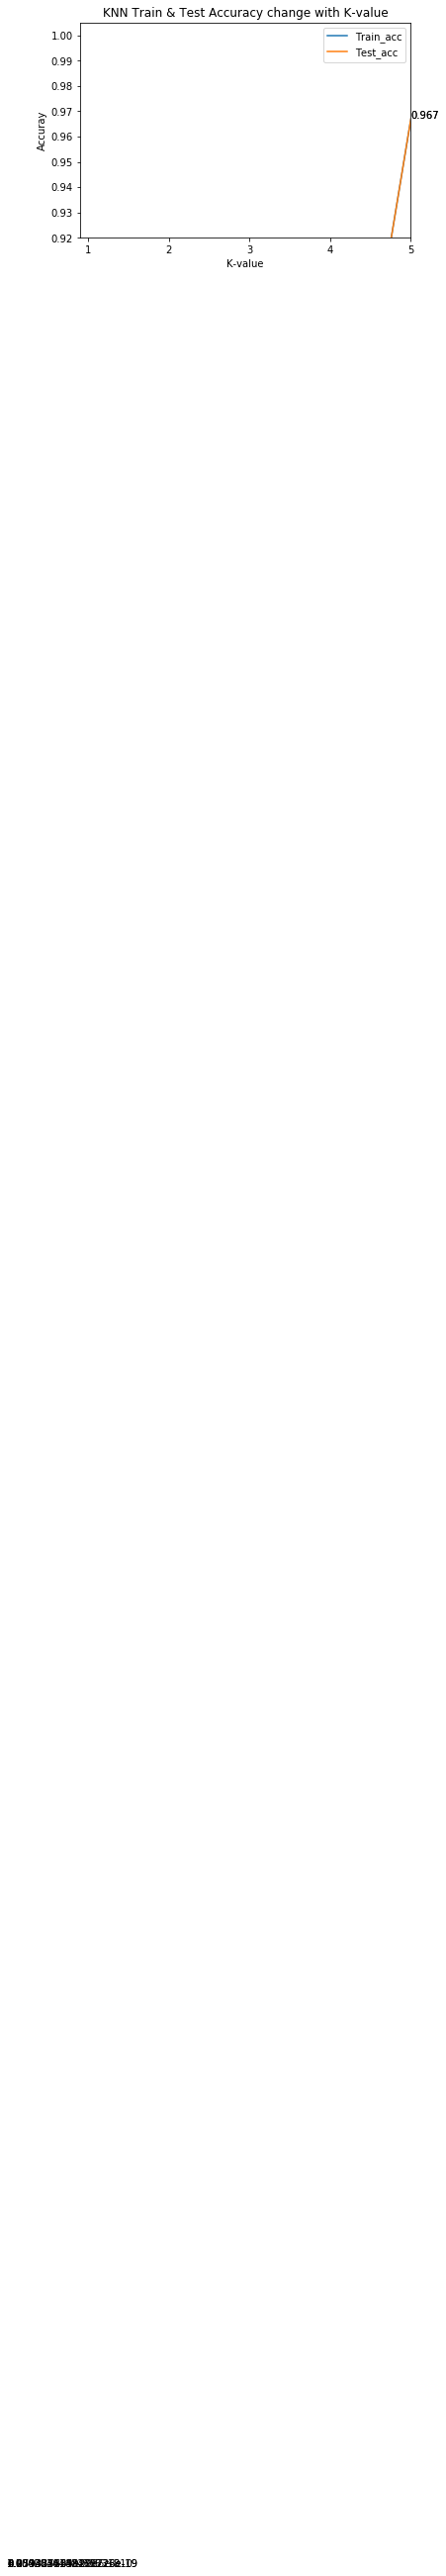

In [58]:
import matplotlib.pyplot as plt

plt.figure()
plt.title('KNN Train & Test Accuracy change with K-value')
plt.xlabel('K-value')
plt.ylabel('Accuray')
plt.plot(k_valchart["K_value"], k_valchart["Train_acc"])
plt.plot(k_valchart["K_value"], k_valchart["Test_acc"])

plt.axis([0.9, 5, 0.92, 1.005])
plt.xticks([1,2,3,4,5])

for a,b in zip(k_valchart["K_value"], k_valchart["Train_acc"]):
    plt.text(a, b, str(b), fontsize = 10)
    
for a,b in zip(k_valchart["K_value"], k_valchart["Test_acc"]):
    plt.text(a, b, str(b), fontsize = 10)
    
plt.legend(loc='upper right')
plt.show()